In [391]:
from pymongo import MongoClient
import time
from bson import ObjectId
import json


database_user = "naya-app"
database_pass = "fromide4toproduct"
connection = MongoClient("ds335678.mlab.com", 35678, retryWrites=False)

# local connection
# connection = MongoClient('mongodb://localhost:27017/')

db = connection["naya-app-database-v1"]

db.authenticate(database_user, database_pass)


True

In [392]:
cursor = db["canvasmodels"].find()

GOOGLE_CANVASES = []
for canvas in cursor:
    if "version" in canvas:
        GOOGLE_CANVASES.append(canvas)

In [393]:
import pandas as pd
df = pd.DataFrame(GOOGLE_CANVASES)

In [394]:
df.columns

Index(['_id', 'quizAnswers', 'moodboards', 'uploads', 'comments',
       'approval_comments', 'transactions', 'onboarding_questions',
       'submitted', 'stage_history', 'createdAt', 'updatedAt', '__v',
       'version', 'client', 'additional_info', 'name', 'sketch', 'budget'],
      dtype='object')

In [395]:
keep_columns = ['_id', 'onboarding_questions',
       'submitted', 'createdAt', 'updatedAt', 'client', 'additional_info', 'name', 'sketch']
clean_df = df[keep_columns]

In [396]:
all_ids = ['question1', 'question2', 'question3','question4','question5', 'visual_moodboard', 'text_moodboard', 'question6','question7', 'question8', 'question9', 'search_upload']
def check_if_key_exists(key, row):
    for e in row:
        if e and e['id'] == key:
            return True
    else:
        return False

def verify_complete(row):
    if len(row) != 12:
        for i, key in enumerate(all_ids):
            if not check_if_key_exists(key, row):
                row.insert(i, {"id": key})
    return row


clean_df['onboarding_questions'] = clean_df['onboarding_questions'].apply(verify_complete)

/Users/vivek/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [397]:
qna = pd.DataFrame(list(clean_df['onboarding_questions']))

In [398]:
qna.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,"{'id': 'question1', 'type': 'QUESTION', 'subTy...","{'id': 'question2', 'type': 'QUESTION', 'subTy...","{'id': 'question3', 'type': 'QUESTION', 'subTy...",{'id': 'question4'},{'id': 'question5'},{'id': 'visual_moodboard'},{'id': 'text_moodboard'},{'id': 'question6'},{'id': 'question7'},{'id': 'question8'},{'id': 'question9'},{'id': 'search_upload'},None
1,"{'id': 'question1', 'type': 'QUESTION', 'subTy...",{'id': 'question2'},{'id': 'question3'},{'id': 'question4'},{'id': 'question5'},{'id': 'visual_moodboard'},{'id': 'text_moodboard'},{'id': 'question6'},{'id': 'question7'},{'id': 'question8'},{'id': 'question9'},{'id': 'search_upload'},None
2,"{'id': 'question1', 'type': 'QUESTION', 'subTy...","{'id': 'question2', 'type': 'QUESTION', 'subTy...","{'id': 'question3', 'type': 'QUESTION', 'subTy...","{'id': 'question4', 'type': 'QUESTION', 'subTy...","{'id': 'question5', 'type': 'QUESTION', 'subTy...","{'id': 'visual_moodboard', 'type': 'VISUAL_MOO...","{'id': 'text_moodboard', 'type': 'TEXT_MOODBOA...","{'id': 'question6', 'type': 'QUESTION', 'subTy...","{'id': 'question7', 'type': 'QUESTION', 'subTy...","{'id': 'question8', 'type': 'QUESTION', 'subTy...",{'id': 'question9'},"{'id': 'search_upload', 'type': 'UPLOAD_PINTER...",None
3,"{'id': 'question1', 'type': 'QUESTION', 'subTy...","{'id': 'question2', 'type': 'QUESTION', 'subTy...","{'id': 'question3', 'type': 'QUESTION', 'subTy...","{'id': 'question4', 'type': 'QUESTION', 'subTy...","{'id': 'question5', 'type': 'QUESTION', 'subTy...","{'id': 'visual_moodboard', 'type': 'VISUAL_MOO...","{'id': 'text_moodboard', 'type': 'TEXT_MOODBOA...","{'id': 'question6', 'type': 'QUESTION', 'subTy...","{'id': 'question7', 'type': 'QUESTION', 'subTy...","{'id': 'question8', 'type': 'QUESTION', 'subTy...","{'id': 'question9', 'type': 'QUESTION', 'subTy...","{'id': 'search_upload', 'type': 'UPLOAD_PINTER...",None
4,"{'id': 'question1', 'type': 'QUESTION', 'subTy...","{'id': 'question2', 'type': 'QUESTION', 'subTy...","{'id': 'question3', 'type': 'QUESTION', 'subTy...","{'id': 'question4', 'type': 'QUESTION', 'subTy...","{'id': 'question5', 'type': 'QUESTION', 'subTy...","{'id': 'visual_moodboard', 'type': 'VISUAL_MOO...","{'id': 'text_moodboard', 'type': 'TEXT_MOODBOA...","{'id': 'question6', 'type': 'QUESTION', 'subTy...","{'id': 'question7', 'type': 'QUESTION', 'subTy...","{'id': 'question8', 'type': 'QUESTION', 'subTy...","{'id': 'question9', 'type': 'QUESTION', 'subTy...",{'id': 'search_upload'},None


In [399]:
#Q1
def process_q1(row):
    if row and 'selected_options' in row:
        return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
    else:
        return None
qna[0] = qna[0].apply(process_q1)

In [400]:
#Q2
def process_q2(row):
    if row and 'selected_options' in row:
        return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
    else:
        return None
qna[1] = qna[1].apply(process_q2)


In [401]:
#Q3
def process_q3(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'question3'):
            return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return None
qna[2] = qna[2].apply(process_q3)


In [402]:
#Q4
def process_q4(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'question4'):
            return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return None
qna[3] = qna[3].apply(process_q4)


In [403]:
#Q5
def process_q5(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'question5'):
            return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return None
qna[4] = qna[4].apply(process_q5)


In [404]:
#VM
def visual_moodboard(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'visual_moodboard'):
            return str([row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return None
qna[5] = qna[5].apply(visual_moodboard)
# qna[5][3]['selected_options']

In [405]:
#TM
def text_moodboard(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'text_moodboard'):
            return str([row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return None
qna[6] = qna[6].apply(text_moodboard)
# qna[6][3]['selected_options']

In [406]:
#Q6
def process_q6(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'question6'):
            return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return None
qna[7] = qna[7].apply(process_q6)
# qna[6][3]['selected_options']

In [407]:
def process_critical_nice_to_have(row):
    return_values = {}
    if row and 'selected_sections' in row:
        if 'Critical Features' in row['selected_sections']:
            return_values["critical"] = str([option['text'] for option in row['selected_sections']['Critical Features']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return_values["critical"] = "Nothing Critical"
        if 'Nice to Have' in row['selected_sections']:
            return_values["nice_to_have"] = str([option['text'] for option in row['selected_sections']['Nice to Have']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return_values["nice_to_have"] =  "Nothing Nice to Have"
        return return_values
    else:
        return None
qna[8] = qna[8].apply(process_critical_nice_to_have)

In [408]:
#Q6
def process_q8(row):
    if row and 'selected_options' in row:
        if(row['id'] == 'question8'):
            return str([option['text'] for option in row['selected_options']]).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return "None"
qna[9] = qna[9].apply(process_q8)
# qna[6][3]['selected_options']

In [409]:
#Q6
def process_q9(row):
    if row and 'text' in row:
        if(row['id'] == 'question9'):
            return str(row['text']).replace('[', '').replace(']', '').replace("'", "")
        else:
            return "Something Wrong"
    else:
        return "None"
qna[10] = qna[10].apply(process_q9)
# qna[6][3]['selected_options']

In [410]:
#Q6
def process_uploads_links(row):
    if row and (('uploads' in row) or ('links' in row)):
        if(row['id'] == 'search_upload'):
            return {"uploads": row['uploads'], "links": row["links"]}
        else:
            return "Something Wrong"
    else:
        return None
qna[11] = qna[11].apply(process_uploads_links)
# qna[6][3]['selected_options']

In [411]:
qna

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Design,Home Office,Fixed Setup,None,None,None,None,None,None,None,None,None,None
1,Design,None,None,None,None,None,None,None,None,None,None,None,None
2,"Design, Management",Living Room,Temporary,"Laptop, Notebooks/Sketchbooks, Plants",AC Power Devices,https://naya-studio-uploads.s3.amazonaws.com/1...,,"Display Items, Eating",{'critical': 'Vertical Work Surface (Eg. Pinup...,"Minimal Desk Surface, Convertible/Collapsible ...",None,"{'uploads': [], 'links': []}",None
3,"Operations, Other (Please Specify)",Home Office,Fixed Setup,"Laptop, Pens/Pencils, Print-outs, External Mon...",Docking Station,https://naya-studio-uploads.s3.amazonaws.com/1...,"Minimalistic, Scandinavian","Work Surface, Display Items","{'critical': 'Desk Height Adjustment, Monitor ...",Dedicated Sit/Stand Desk,"Impromptu conversations, walks for food/coffee...","{'uploads': [], 'links': []}",None
4,Research,Home Office,"Private, Temporary","Laptop, Notebooks/Sketchbooks, Hub Max / Ambie...","AC Power Devices, DC Power Devices, USB Hub, D...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Airy, Modern, Casual, Eclectic, ...","Work Surface, Reading, Whiteboarding/Sketching...","{'critical': 'Desk Height Adjustment, Laptop S...","Mobile Desk, Minimal Desk Surface, Dedicated S...","workshop, switch from laptop to sketching",None,None
5,Design,Home Office,"Fixed Setup, Shared","Laptop, Pens/Pencils, Notebooks/Sketchbooks, R...","AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Japanese, Casual, Chic, Eclectic...","Work Surface, Eating, Drinking, Storage, Readi...","{'critical': 'Integrated Cord Management, Moni...",Dedicated Sit/Stand Desk,Accidental encounters and unplanned small talk.\n,"{'uploads': [], 'links': []}",None
6,Engineering,"Dining Room, Home Office","Fixed Setup, Shared","Laptop, Notebooks/Sketchbooks, Plants, Externa...","DC Power Devices, Multiport USB Wall Charger",https://naya-studio-uploads.s3.amazonaws.com/1...,"Casual, Minimalistic, Modern, Airy","Display Items, Whiteboarding/Sketching","{'critical': 'Laptop Stand, Integrated Cord Ma...",Minimal Desk Surface,The social aspect of being able to strike up c...,"{'uploads': [], 'links': ['https://www.cratean...",None
7,Design,Home Office,"Fixed Setup, Private","Laptop, Hub Max / Ambient Screen, Pens/Pencils...","AC Power Devices, USB Hub, Power Strip, Dockin...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Modern, Airy, Angular","Work Surface, Eating, Storage","{'critical': 'Integrated Cord Management, Moni...",Dedicated Sit/Stand Desk,Rapid team conversations - being able to just ...,None,None
8,Design,Home Office,Private,"Pens/Pencils, Notebooks/Sketchbooks, Laptop, R...","AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Organic, Geometric, Modern, Mini...","Work Surface, Whiteboarding/Sketching, Drinking","{'critical': 'Laptop Stand, Desk Height Adjust...","Dedicated Sit/Stand Desk, Dedicated Fixed-Heig...",None,None,None
9,Research,Home Office,Fixed Setup,"Laptop, Pens/Pencils, Notebooks/Sketchbooks, P...","Docking Station, DC Power Devices, AC Power De...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Rustic, Casual, Feminine","Eating, Work Surface, Drinking, Whiteboarding/...","{'critical': 'Integrated Cord Management, Lapt...",Dedicated Sit/Stand Desk,whiteboarding and casual collisions,"{'uploads': [], 'links': []}",None


In [412]:
def fill_in(row):
    if not row:
        return {'critical': '', 'nice_to_have': ''}
    else:
        return row
qna[8] = qna[8].apply(fill_in)

qna = pd.concat([qna, pd.DataFrame(list(qna[8]))], axis=1)

In [413]:
def fill_in_uploads(row):
    if not row:
        return {'uploads': '', 'links': ''}
    else:
        return row
qna[11] = qna[11].apply(fill_in_uploads)

qna = pd.concat([qna, pd.DataFrame(list(qna[11]))], axis=1)


In [414]:
qna.columns

Index([             0,              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,     'critical', 'nice_to_have',      'uploads',
              'links'],
      dtype='object')

In [415]:
qna

,0,1,2,3,4,5,6,7,8,9,10,11,12,critical,nice_to_have,uploads,links
0,Design,Home Office,Fixed Setup,None,None,None,None,None,"{'critical': '', 'nice_to_have': ''}",None,None,"{'uploads': '', 'links': ''}",None,,,,
1,Design,None,None,None,None,None,None,None,"{'critical': '', 'nice_to_have': ''}",None,None,"{'uploads': '', 'links': ''}",None,,,,
2,"Design, Management",Living Room,Temporary,"Laptop, Notebooks/Sketchbooks, Plants",AC Power Devices,https://naya-studio-uploads.s3.amazonaws.com/1...,,"Display Items, Eating",{'critical': 'Vertical Work Surface (Eg. Pinup...,"Minimal Desk Surface, Convertible/Collapsible ...",None,"{'uploads': [], 'links': []}",None,Vertical Work Surface (Eg. Pinup/Whiteboard),Laptop Stand,[],[]
3,"Operations, Other (Please Specify)",Home Office,Fixed Setup,"Laptop, Pens/Pencils, Print-outs, External Mon...",Docking Station,https://naya-studio-uploads.s3.amazonaws.com/1...,"Minimalistic, Scandinavian","Work Surface, Display Items","{'critical': 'Desk Height Adjustment, Monitor ...",Dedicated Sit/Stand Desk,"Impromptu conversations, walks for food/coffee...","{'uploads': [], 'links': []}",None,"Desk Height Adjustment, Monitor Adjustability,...","Laptop Stand, Vertical Work Surface (Eg. Pinup...",[],[]
4,Research,Home Office,"Private, Temporary","Laptop, Notebooks/Sketchbooks, Hub Max / Ambie...","AC Power Devices, DC Power Devices, USB Hub, D...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Airy, Modern, Casual, Eclectic, ...","Work Surface, Reading, Whiteboarding/Sketching...","{'critical': 'Desk Height Adjustment, Laptop S...","Mobile Desk, Minimal Desk Surface, Dedicated S...","workshop, switch from laptop to sketching","{'uploads': '', 'links': ''}",None,"Desk Height Adjustment, Laptop Stand",Vertical Work Surface (Eg. Pinup/Whiteboard),,
5,Design,Home Office,"Fixed Setup, Shared","Laptop, Pens/Pencils, Notebooks/Sketchbooks, R...","AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Japanese, Casual, Chic, Eclectic...","Work Surface, Eating, Drinking, Storage, Readi...","{'critical': 'Integrated Cord Management, Moni...",Dedicated Sit/Stand Desk,Accidental encounters and unplanned small talk.\n,"{'uploads': [], 'links': []}",None,"Integrated Cord Management, Monitor Adjustability","Laptop Stand, Vertical Work Surface (Eg. Pinup...",[],[]
6,Engineering,"Dining Room, Home Office","Fixed Setup, Shared","Laptop, Notebooks/Sketchbooks, Plants, Externa...","DC Power Devices, Multiport USB Wall Charger",https://naya-studio-uploads.s3.amazonaws.com/1...,"Casual, Minimalistic, Modern, Airy","Display Items, Whiteboarding/Sketching","{'critical': 'Laptop Stand, Integrated Cord Ma...",Minimal Desk Surface,The social aspect of being able to strike up c...,"{'uploads': [], 'links': ['https://www.cratean...",None,"Laptop Stand, Integrated Cord Management","Desk Height Adjustment, Monitor Adjustability",[],[https://www.crateandbarrel.com/helsing-desk/s...
7,Design,Home Office,"Fixed Setup, Private","Laptop, Hub Max / Ambient Screen, Pens/Pencils...","AC Power Devices, USB Hub, Power Strip, Dockin...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Modern, Airy, Angular","Work Surface, Eating, Storage","{'critical': 'Integrated Cord Management, Moni...",Dedicated Sit/Stand Desk,Rapid team conversations - being able to just ...,"{'uploads': '', 'links': ''}",None,"Integrated Cord Management, Monitor Adjustability",Desk Height Adjustment,,
8,Design,Home Office,Private,"Pens/Pencils, Notebooks/Sketchbooks, Laptop, R...","AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Organic, Geometric, Modern, Mini...","Work Surface, Whiteboarding/Sketching, Drinking","{'critical': 'Laptop Stand, Desk Height Adjust...","Dedicated Sit/Stand Desk, Dedicated Fixed-Heig...",None,"{'uploads': '', 'links': ''}",None,"Laptop Stand, Desk Height Adjustment, Vertical...",Integ

In [416]:
qna.columns = ['How would you describe your daily work?', 'Where do you usually work when you WFH?', 'Which of the following descriptions apply to your current workspace', 'What is currently on your desk?', 'What cables and outlets are you using?',
              'What style do you find most inspiring?', 'Select the words that represent your furniture style', 'What else do you want to use your desk for?', 'Of the features below, what is critical for you and what is a nice to have?', 'Which desk typology would best fit your needs/wants in your home workplace?', 'What did you love about collaboration at the office, that you have trouble doing from your desk at home?', 'Do you have any inspirations for office furniture?', 'search_upload', 'critical', 'nice_to_have', 'uploads',
              'links']


In [418]:
qna.to_csv("google_data.csv")

In [419]:
qna.columns

Index(['How would you describe your daily work?',
       'Where do you usually work when you WFH?',
       'Which of the following descriptions apply to your current workspace',
       'What is currently on your desk?',
       'What cables and outlets are you using?',
       'What style do you find most inspiring?',
       'Select the words that represent your furniture style',
       'What else do you want to use your desk for?',
       'Of the features below, what is critical for you and what is a nice to have?',
       'Which desk typology would best fit your needs/wants in your home workplace?',
       'What did you love about collaboration at the office, that you have trouble doing from your desk at home?',
       'Do you have any inspirations for office furniture?', 'search_upload',
       'critical', 'nice_to_have', 'uploads', 'links'],
      dtype='object')

In [420]:
keep_columns = ['How would you describe your daily work?',
       'Where do you usually work when you WFH?',
       'Which of the following descriptions apply to your current workspace',
       'What is currently on your desk?',
       'What cables and outlets are you using?',
       'What style do you find most inspiring?',
       'Select the words that represent your furniture style',
       'What else do you want to use your desk for?',
       'Which desk typology would best fit your needs/wants in your home workplace?',
       'What did you love about collaboration at the office, that you have trouble doing from your desk at home?',
       'critical', 'nice_to_have', 'uploads', 'links']
qna = qna[keep_columns]

In [421]:
qna

,How would you describe your daily work?,Where do you usually work when you WFH?,Which of the following descriptions apply to your current workspace,What is currently on your desk?,What cables and outlets are you using?,What style do you find most inspiring?,Select the words that represent your furniture style,What else do you want to use your desk for?,Which desk typology would best fit your needs/wants in your home workplace?,"What did you love about collaboration at the office, that you have trouble doing from your desk at home?",critical,nice_to_have,uploads,links
0,Design,Home Office,Fixed Setup,None,None,None,None,None,None,None,,,,
1,Design,None,None,None,None,None,None,None,None,None,,,,
2,"Design, Management",Living Room,Temporary,"Laptop, Notebooks/Sketchbooks, Plants",AC Power Devices,https://naya-studio-uploads.s3.amazonaws.com/1...,,"Display Items, Eating","Minimal Desk Surface, Convertible/Collapsible ...",None,Vertical Work Surface (Eg. Pinup/Whiteboard),Laptop Stand,[],[]
3,"Operations, Other (Please Specify)",Home Office,Fixed Setup,"Laptop, Pens/Pencils, Print-outs, External Mon...",Docking Station,https://naya-studio-uploads.s3.amazonaws.com/1...,"Minimalistic, Scandinavian","Work Surface, Display Items",Dedicated Sit/Stand Desk,"Impromptu conversations, walks for food/coffee...","Desk Height Adjustment, Monitor Adjustability,...","Laptop Stand, Vertical Work Surface (Eg. Pinup...",[],[]
4,Research,Home Office,"Private, Temporary","Laptop, Notebooks/Sketchbooks, Hub Max / Ambie...","AC Power Devices, DC Power Devices, USB Hub, D...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Airy, Modern, Casual, Eclectic, ...","Work Surface, Reading, Whiteboarding/Sketching...","Mobile Desk, Minimal Desk Surface, Dedicated S...","workshop, switch from laptop to sketching","Desk Height Adjustment, Laptop Stand",Vertical Work Surface (Eg. Pinup/Whiteboard),,
5,Design,Home Office,"Fixed Setup, Shared","Laptop, Pens/Pencils, Notebooks/Sketchbooks, R...","AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Japanese, Casual, Chic, Eclectic...","Work Surface, Eating, Drinking, Storage, Readi...",Dedicated Sit/Stand Desk,Accidental encounters and unplanned small talk.\n,"Integrated Cord Management, Monitor Adjustability","Laptop Stand, Vertical Work Surface (Eg. Pinup...",[],[]
6,Engineering,"Dining Room, Home Office","Fixed Setup, Shared","Laptop, Notebooks/Sketchbooks, Plants, Externa...","DC Power Devices, Multiport USB Wall Charger",https://naya-studio-uploads.s3.amazonaws.com/1...,"Casual, Minimalistic, Modern, Airy","Display Items, Whiteboarding/Sketching",Minimal Desk Surface,The social aspect of being able to strike up c...,"Laptop Stand, Integrated Cord Management","Desk Height Adjustment, Monitor Adjustability",[],[https://www.crateandbarrel.com/helsing-desk/s...
7,Design,Home Office,"Fixed Setup, Private","Laptop, Hub Max / Ambient Screen, Pens/Pencils...","AC Power Devices, USB Hub, Power Strip, Dockin...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Modern, Airy, Angular","Work Surface, Eating, Storage",Dedicated Sit/Stand Desk,Rapid team conversations - being able to just ...,"Integrated Cord Management, Monitor Adjustability",Desk Height Adjustment,,
8,Design,Home Office,Private,"Pens/Pencils, Notebooks/Sketchbooks, Laptop, R...","AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Organic, Geometric, Modern, Mini...","Work Surface, Whiteboarding/Sketching, Drinking","Dedicated Sit/Stand Desk, Dedicated Fixed-Heig...",None,"Laptop Stand, Desk Height Adjustment, Vertical...",Integrated Cord Management,,
9,Research,Home Office,Fixed Setup,"Laptop, Pens/Pencils, Notebooks/Sketchbooks, P...","Docking Station, DC Power Devices, AC Power De...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Rustic, Casual, Feminine","Eating, Work Surface,

In [422]:
expanded_df = pd.concat([clean_df, qna], axis=1)

In [423]:
keep_columns = ['_id', 'submitted', 'createdAt', 'updatedAt',
       'additional_info', 'name', 'sketch',
       'How would you describe your daily work?',
       'Where do you usually work when you WFH?',
       'Which of the following descriptions apply to your current workspace',
       'What is currently on your desk?',
       'What cables and outlets are you using?',
       'What style do you find most inspiring?',
       'Select the words that represent your furniture style',
       'What else do you want to use your desk for?',
       'Which desk typology would best fit your needs/wants in your home workplace?',
       'What did you love about collaboration at the office, that you have trouble doing from your desk at home?',
       'critical', 'nice_to_have', 'uploads', 'links']
expanded_df = expanded_df[keep_columns]

In [424]:
expanded_df[expanded_df['submitted'] == True]

,_id,submitted,createdAt,updatedAt,additional_info,name,sketch,How would you describe your daily work?,Where do you usually work when you WFH?,Which of the following descriptions apply to your current workspace,...,What cables and outlets are you using?,What style do you find most inspiring?,Select the words that represent your furniture style,What else do you want to use your desk for?,Which desk typology would best fit your needs/wants in your home workplace?,"What did you love about collaboration at the office, that you have trouble doing from your desk at home?",critical,nice_to_have,uploads,links
3,5f3c03f9ff6ebd7b9c5b5964,True,2020-08-18 16:38:17.039,2020-08-18 16:42:27.903,,plau,NaN,"Operations, Other (Please Specify)",Home Office,Fixed Setup,...,Docking Station,https://naya-studio-uploads.s3.amazonaws.com/1...,"Minimalistic, Scandinavian","Work Surface, Display Items",Dedicated Sit/Stand Desk,"Impromptu conversations, walks for food/coffee...","Desk Height Adjustment, Monitor Adjustability,...","Laptop Stand, Vertical Work Surface (Eg. Pinup...",[],[]
4,5f3c0360ff6ebdf26e5b5962,True,2020-08-18 16:35:44.570,2020-08-18 16:51:34.516,,Kat,5f3c06daff6ebd70255b596d,Research,Home Office,"Private, Temporary",...,"AC Power Devices, DC Power Devices, USB Hub, D...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Airy, Modern, Casual, Eclectic, ...","Work Surface, Reading, Whiteboarding/Sketching...","Mobile Desk, Minimal Desk Surface, Dedicated S...","workshop, switch from laptop to sketching","Desk Height Adjustment, Laptop Stand",Vertical Work Surface (Eg. Pinup/Whiteboard),,
5,5f3c047aff6ebd19515b5966,True,2020-08-18 16:40:26.286,2020-08-18 16:45:21.159,,Tiffany Fu,5f3c0594ff6ebd153f5b5969,Design,Home Office,"Fixed Setup, Shared",...,"AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Japanese, Casual, Chic, Eclectic...","Work Surface, Eating, Drinking, Storage, Readi...",Dedicated Sit/Stand Desk,Accidental encounters and unplanned small talk.\n,"Integrated Cord Management, Monitor Adjustability","Laptop Stand, Vertical Work Surface (Eg. Pinup...",[],[]
6,5f3c06b4ff6ebdb5b35b596a,True,2020-08-18 16:49:56.074,2020-08-18 16:57:18.499,Just moved to a bigger place this week so have...,Sandeep Vadivel,NaN,Engineering,"Dining Room, Home Office","Fixed Setup, Shared",...,"DC Power Devices, Multiport USB Wall Charger",https://naya-studio-uploads.s3.amazonaws.com/1...,"Casual, Minimalistic, Modern, Airy","Display Items, Whiteboarding/Sketching",Minimal Desk Surface,The social aspect of being able to strike up c...,"Laptop Stand, Integrated Cord Management","Desk Height Adjustment, Monitor Adjustability",[],[https://www.crateandbarrel.com/helsing-desk/s...
7,5f3c0b91ff6ebdfc675b5972,True,2020-08-18 17:10:41.986,2020-08-18 17:14:16.534,,Nigel Marcussen,NaN,Design,Home Office,"Fixed Setup, Private",...,"AC Power Devices, USB Hub, Power Strip, Dockin...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Modern, Airy, Angular","Work Surface, Eating, Storage",Dedicated Sit/Stand Desk,Rapid team conversations - being able to just ...,"Integrated Cord Management, Monitor Adjustability",Desk Height Adjustment,,
8,5f3c1c16ff6ebd35a55b5974,True,2020-08-18 18:21:10.210,2020-08-18 18:24:20.986,,Michelle,NaN,Design,Home Office,Private,...,"AC Power Devices, USB Hub, Wired Peripherals, ...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Organic, Geometric, Modern, Mini...","Work Surface, Whiteboarding/Sketching, Drinking","Dedicated Sit/Stand Desk, Dedicated Fixed-Heig...",None,"Laptop Stand, Desk Height Adjustment, Vertical...",Integrated Cord Management,,
9,5f3c342cff6ebdc10b5b5978,True,2020-08-18 20:03:56.092,2020-08-18 22:11:13.922,,Jennie Bernstein,5f3c34b4ff6ebdb3285b597a,Research,Home Office,Fixed Setup,...,"Docking Station, DC Power Devices, AC Power De...",https://naya-studio-uploads.s3.amazonaws.com/1...,"Scandinavian, Rustic,

In [425]:
final_df = expanded_df

In [426]:
final_df['Where do you usually work when you WFH?'].value_counts()

Home Office                                 23
Living Room                                  8
Bedroom                                      6
Home Office, Living Room                     3
Other (Please Specify)                       2
Dining Room                                  2
Home Office, Dining Room                     2
Home Office, Closet, Outdoors                1
Living Room, Bedroom                         1
Dining Room, Home Office                     1
Bedroom, Home Office                         1
Closet                                       1
Closet, Home Office, Outdoors                1
Design, Management, Operations, Research     1
Home Office, Outdoors                        1
Name: Where do you usually work when you WFH?, dtype: int64

In [443]:
def plot_value_counts(COLUMN_NAME):
    final_df[COLUMN_NAME].str.split(',\s+', expand=True).stack().value_counts().plot(kind='bar')

def print_value_counts(COLUMN_NAME):
    return final_df[COLUMN_NAME].str.split(',\s+', expand=True).stack().value_counts()



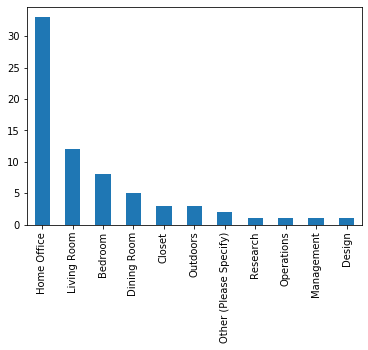

In [428]:
COLUMN_NAME = 'Where do you usually work when you WFH?'
plot_value_counts(COLUMN_NAME)

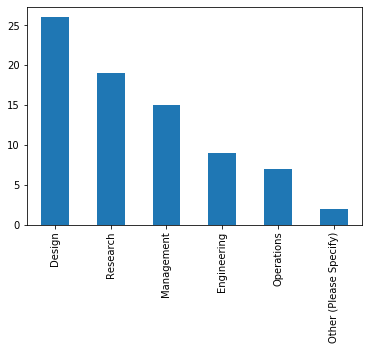

In [445]:
COLUMN_NAME = 'How would you describe your daily work?'
plot_value_counts(COLUMN_NAME)

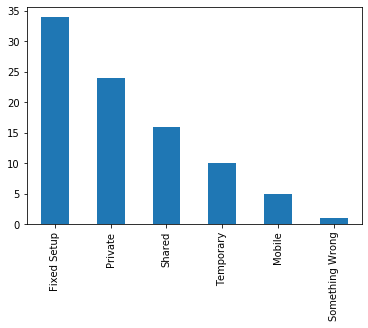

In [447]:
COLUMN_NAME = 'Which of the following descriptions apply to your current workspace'
plot_value_counts(COLUMN_NAME)

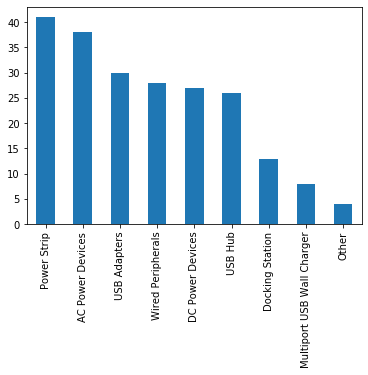

In [448]:
COLUMN_NAME = 'What cables and outlets are you using?'
plot_value_counts(COLUMN_NAME)

In [451]:
COLUMN_NAME = 'What style do you find most inspiring?'
print_value_counts(COLUMN_NAME)[print_value_counts(COLUMN_NAME)>2]

https://naya-studio-uploads.s3.amazonaws.com/1571846198623.jpeg    7
https://naya-studio-uploads.s3.amazonaws.com/1571849375898.jpeg    6
https://naya-studio-uploads.s3.amazonaws.com/1571844696732.jpeg    6
https://naya-studio-uploads.s3.amazonaws.com/1571849198580.jpeg    5
https://naya-studio-uploads.s3.amazonaws.com/1571849273728.jpeg    4
https://naya-studio-uploads.s3.amazonaws.com/1571845420958.jpeg    4
https://naya-studio-uploads.s3.amazonaws.com/1571846713288.jpeg    4
https://naya-studio-uploads.s3.amazonaws.com/1571845613256.jpeg    4
https://naya-studio-uploads.s3.amazonaws.com/1571844600819.jpeg    3
https://naya-studio-uploads.s3.amazonaws.com/1571849337118.jpeg    3
https://naya-studio-uploads.s3.amazonaws.com/1571845386554.jpeg    3
https://naya-studio-uploads.s3.amazonaws.com/1571846570223.jpeg    3
https://naya-studio-uploads.s3.amazonaws.com/1571849233045.jpeg    3
https://naya-studio-uploads.s3.amazonaws.com/1571846904285.jpeg    3
https://naya-studio-uploads.s3.ama

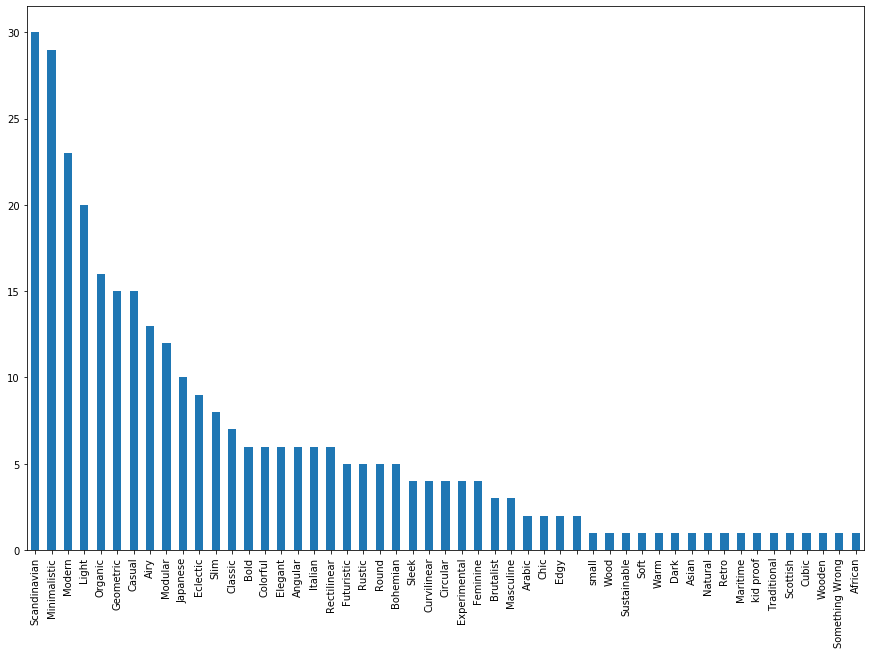

In [452]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
COLUMN_NAME = 'Select the words that represent your furniture style'
plot_value_counts(COLUMN_NAME)

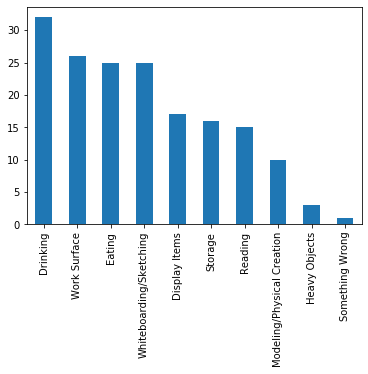

In [453]:
COLUMN_NAME = 'What else do you want to use your desk for?'
plot_value_counts(COLUMN_NAME)

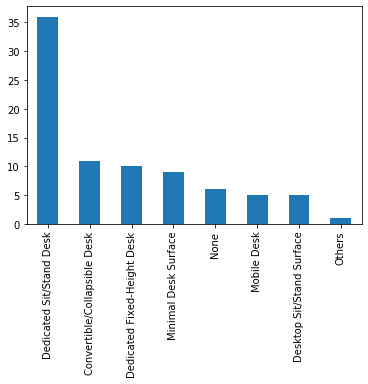

In [454]:
COLUMN_NAME = 'Which desk typology would best fit your needs/wants in your home workplace?'
plot_value_counts(COLUMN_NAME)

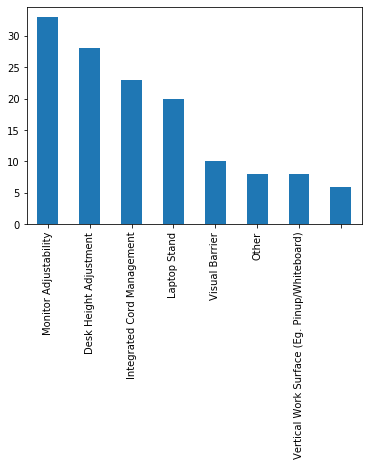

In [455]:
COLUMN_NAME = 'critical'
plot_value_counts(COLUMN_NAME)

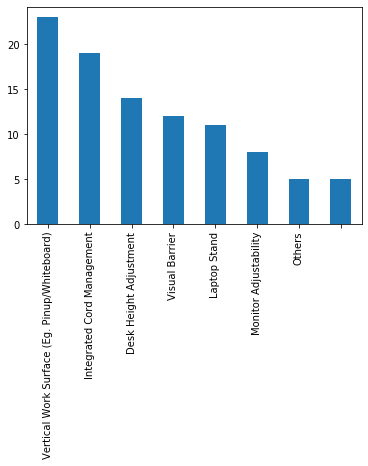

In [437]:
COLUMN_NAME = 'nice_to_have'
plot_value_counts(COLUMN_NAME)

In [438]:
final_df['uploads'][21]

[{'ext': '1552919368.webp',
  'id': '5f3d4dffd8a839f340e5d7fb',
  'link': 'https://storage.googleapis.com/naya-studio-uploads/uploads/1597853182938.1552919368.webp',
  'name': 'mr1_mirella_stone_gray_desk_configuration__67995',
  'status': True,
  'thumbnails': []},
 {'ext': 'jpg',
  'id': '5f3d4ef9d8a839f340e5d7fd',
  'link': 'https://storage.googleapis.com/naya-studio-uploads/uploads/1597853432957.jpg',
  'name': 'desk2',
  'status': True,
  'thumbnails': ['https://storage.googleapis.com/naya-studio-uploads/uploads/1597853432957-x256.jpg',
   'https://storage.googleapis.com/naya-studio-uploads/uploads/1597853432957-x512.jpg',
   'https://storage.googleapis.com/naya-studio-uploads/uploads/1597853432957-x1024.jpg']},
 {'ext': 'jpg',
  'id': '5f3d4f0ed8a839f340e5d7fe',
  'link': 'https://storage.googleapis.com/naya-studio-uploads/uploads/1597853453943.jpg',
  'name': 'desk3',
  'status': True,
  'thumbnails': ['https://storage.googleapis.com/naya-studio-uploads/uploads/1597853453943-x25

In [439]:
final_df['links']

0                                                      
1                                                      
2                                                    []
3                                                    []
4                                                      
5                                                    []
6     [https://www.crateandbarrel.com/helsing-desk/s...
7                                                      
8                                                      
9                                                    []
10                                                   []
11                                                   []
12                                                   []
13                                                     
14                                                     
15                                                   []
16                                                     
17                                              

In [440]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    words = [word for word in words if word not in stopwords.words('english')]
#     print(words)
#     print([word.lemmatize("v") for word in words])
    return [word.lemmatize("v") for word in words]


In [457]:
final_df.columns

Index(['_id', 'submitted', 'createdAt', 'updatedAt', 'additional_info', 'name',
       'sketch', 'How would you describe your daily work?',
       'Where do you usually work when you WFH?',
       'Which of the following descriptions apply to your current workspace',
       'What is currently on your desk?',
       'What cables and outlets are you using?',
       'What style do you find most inspiring?',
       'Select the words that represent your furniture style',
       'What else do you want to use your desk for?',
       'Which desk typology would best fit your needs/wants in your home workplace?',
       'What did you love about collaboration at the office, that you have trouble doing from your desk at home?',
       'critical', 'nice_to_have', 'uploads', 'links'],
      dtype='object')

In [458]:
COLUMN_NAME = 'What did you love about collaboration at the office, that you have trouble doing from your desk at home?'

In [459]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# words = TextBlob(stopwords.words('english')).words


vect = CountVectorizer(analyzer=split_into_lemmas, binary=True, stop_words='english')
term_counts = vect.fit_transform(final_df[COLUMN_NAME]).toarray().sum(axis=0)
term_counts = pd.DataFrame(term_counts.reshape(-1, 1), index=vect.get_feature_names(), columns=['count'])

In [460]:
term_counts.sort_values('count', ascending=False)[term_counts['count']>1]

/Users/vivek/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,count
none,15
conversations,11
people,8
casual,7
home,5
around,5
walk,5
space,5
work,5
time,4
